In [42]:
#Import Libraries and Read the data
import pandas as pd 
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [43]:
df_train  =  pd.read_csv(r"H:\Interview\SP\Project\data\train.csv")
df_test = pd.read_csv(r"H:\Interview\SP\Project\data\test.csv")


In [44]:
# Missing value check
df_train.isnull().values.any()

False

In [45]:
# Missing value check
df_test.isnull().values.any()

False

<AxesSubplot:>

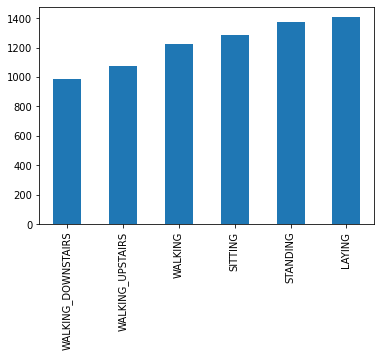

In [46]:
# Unbalanced dataset check
df_train['Activity'].value_counts().sort_values().plot(kind = 'bar')

In [47]:
y_train = df_train.Activity
X_train = df_train.drop(['subject', 'Activity'], axis=1)
y_test = df_test.Activity
X_test = df_test.drop(['subject', 'Activity'], axis=1)
print('Training data size : ', X_train.shape)
print('Test data size : ', X_test.shape)

Training data size :  (7352, 561)
Test data size :  (2947, 561)


In [48]:
# Training data normalization
scaling_data = MinMaxScaler()
X_train = scaling_data.fit_transform(X_train)
X_test = scaling_data.transform(X_test)

In [49]:
# Remove outliers
import numpy as np
from scipy import stats
X_train[(np.abs(stats.zscore(X_train)) < 3).all(axis=1)]

array([[0.63982653, 0.49026642, 0.44326915, ..., 0.07553327, 0.79872236,
        0.47544109],
       [0.63859939, 0.49495108, 0.44743138, ..., 0.07518421, 0.80155372,
        0.47893681],
       [0.63972694, 0.49017961, 0.44498892, ..., 0.07392488, 0.79975923,
        0.47849501],
       ...,
       [0.59743331, 0.50262016, 0.42567923, ..., 0.10605478, 0.84163277,
        0.51615863],
       [0.65306352, 0.4871204 , 0.4480095 , ..., 0.10842441, 0.84388211,
        0.51593893],
       [0.60789459, 0.48854003, 0.38164353, ..., 0.08607866, 0.82331508,
        0.50558827]])

In [50]:
# Check result
print('Training data size : ', X_train.shape)

Training data size :  (7352, 561)


In [51]:
classifiers = []

In [52]:
model1 = xgboost.XGBClassifier()
classifiers.append(model1)
model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)

In [53]:
model2.fit(X_train, y_train)
y_pred= model2.predict(X_test)
print(type(y_pred))
print(y_pred)

<class 'numpy.ndarray'>
['STANDING' 'STANDING' 'STANDING' ... 'WALKING_UPSTAIRS'
 'WALKING_UPSTAIRS' 'WALKING_UPSTAIRS']


In [54]:
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

d:\Python\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:02:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) is 0.9392602646759416
Confusion Matrix of XGBClas

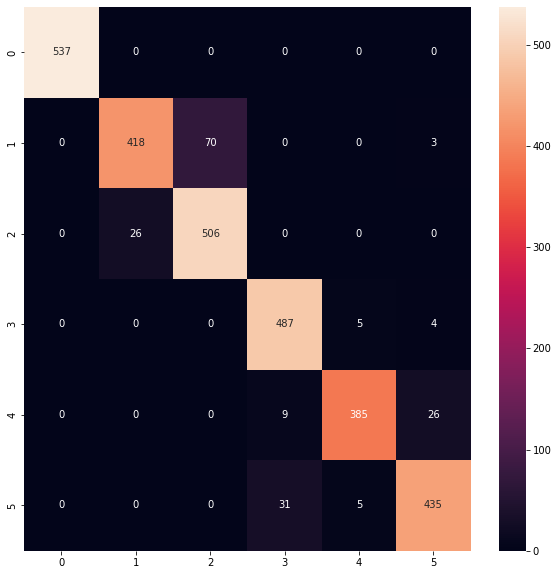

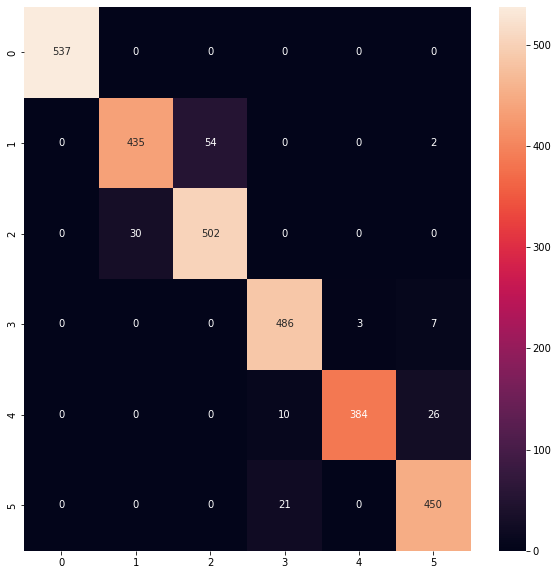

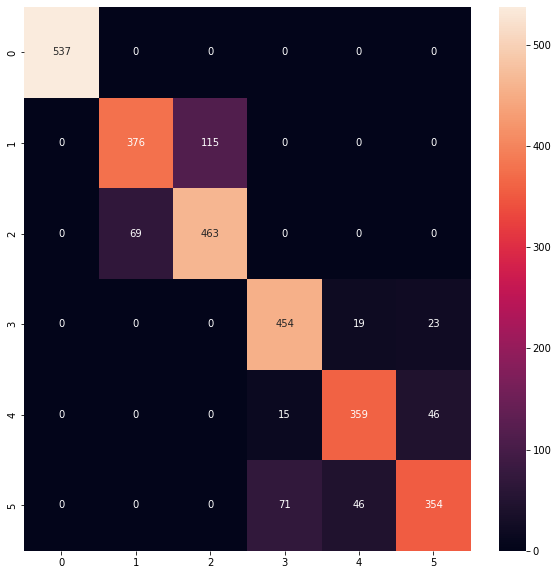

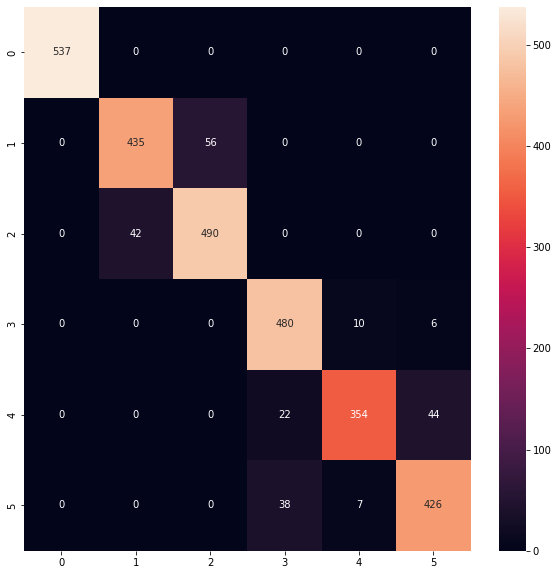

In [55]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = str(clf)[:3]
    filename = '%s_model.sav'%name
    joblib.dump(clf, open(filename, 'wb'))
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    print("Confusion Matrix of %s:"%clf)
    plt.figure(figsize=(10, 10))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
    plt.savefig('%s.png'%name)
    # cm = confusion_matrix(y_test, y_pred)